# 2.論文読解

以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。


[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99


◾️CNN物体検出<br>
https://arxiv.org/pdf/1506.01497.pdf



### ◾️条件
答える際は論文のどの部分からそれが分かるかを書く。
必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。


# 問題①物体検出の分野にはどういった手法が存在したか。<br>

最先端の物体検出ネットワークは，物体の位置を推定するために領域提案アルゴリズムに依存していて、今までは領域提案の計算がボトルネックになっていた<br>
現在はfast R-CNNやSPPnetのアルゴリズムが登場し、時間短縮が可能<br>
違いはRPNを導入しているか否か<br>
<br>


Objectness：
画像を１万枚以上に分割し、スコアをつけることで物体の領域を検出する。しかし、１度学習をすると再帰的に戻る手段がなく、精度があまりよくない。

Selective Search：色やテクスチャの特徴を元に類似度が高いポイントを区別していく手法。最後はグルーピングを行う。デメリットとしては、細部の調整が難しい点。

EdgeBoxes：エッジを利用して、画像の境界線を分断している。精度と学習の速さはピカ一だが、推論のタイミングでとても遅いことが特徴。

◾️　引用　<br>
【1ページ目】<br>
dvances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region　proposal computation as a bottleneck.　<br>
In this work, we introduce a Region Proposal Network (RPN) that shares full-image
convolutional features with the detection network, thus enabling nearly cost-free region proposals.　<br>
An RPN is a fully convolutional　network that simultaneously predicts object bounds and objectness scores at each position.<br>
<br>
EdgeBoxes [6] currently provides the best tradeoff between proposal quality and speed, at 0.2 seconds per image. 
Nevertheless, the region proposal step still consumes as much running time as the detection network

【参考URL】<br>
https://qiita.com/t-hiroyoshi/items/e9def50ba2c2249db04b#:~:text=Selective%20Search&text=%E8%89%B2%E3%82%84%E3%83%86%E3%82%AF%E3%82%B9%E3%83%81%E3%83%A3%E7%89%B9%E5%BE%B4%E3%82%92,%E3%82%92%E8%AA%8D%E8%AD%98%E3%81%99%E3%82%8B%E3%81%A8%E3%81%84%E3%81%86%E6%96%B9%E6%B3%95%E3%80%82

【論文】<br>
C. L. Zitnick and P. Dollar, “Edge boxes: Locating object ´
proposals from edges,” in European Conference on Computer
Vision (ECCV), 2014.



# 問題② Fasterとあるが、どういった仕組みで高速化したのか。<br>
RPNとAnchor Boxが肝。
RPNとは、物体が写っている場所とバウンディングボックスを生成する技術を使っている。
Anchor自体がCNNで生成された特徴量マップのW、H毎に表現するポイントのことで
Anchor Boxとは、重心をAnchorに合わせ、長さ(pixcel)とアスペクト比分作成されるバウンディングボックスを示す。
このアンカーボックス理論では、数（k）が9個など数が少ないので、従来のMultiBoxなどと比べて全体的に層が少ない事が高速化の理由である。
multiboxではアンカーの量が全体的に多かったため、その点を圧縮する事で出力層に対する短縮を行った。

通常のCNNではサイズを何度もリサイズして畳み込むので時間がかかってしまうが、
R-CNNでは、複数のRPNのバウンディングボックスを利用し特徴量マップの利用を少なく実装が可能？？

◾️引用<br>
【2ページ目】<br>
On top of these convolutional features, we construct an RPN by adding a few additional convolutional layers that simultaneously regress region bounds and objectness scores at each location on a regular grid. 

【4ページ目】<br>
An important property of our approach is that it is translation invariant, both in terms of the anchors and the functions that compute proposals relative to the anchors. 
If one translates an object in an image, the proposal should translate and the same function should be able to predict the proposal in either location. This translation-invariant property is guaranteed by our method5. 
As a comparison, the MultiBox method [27] uses k-means to generate 800 anchors, which are not translation invariant. So MultiBox does not guarantee that the same proposal is generated if an object is translated.

【Qiita】
https://qiita.com/leetmikeal/items/7c0d23e39bf38ab8be23

【論文　multiboxとは】
Scalable, High-Quality Object Detection


# 問題③One-Stageの手法とTwo-Stageの手法はどう違うのか。<br>

結論から言うと<br>
One-stage：領域提案の部分が分断されずに、CNNの処理と結びついているもの YOLO, SSD<br>
Two-stage：領域提案のものがCNNの処理と分断されているもの。fast-CNN<br>

尚、論文ではこのように記載されている。
1つ目のモジュールは、深い 完全な畳み込みネットワークで密な領域を提案するもの（CNN）<br>
第2のモジュールは，提案された領域（RPN）を使用するFast R-CNN検出器[2]である．<br>

◾️引用<br>
【2ページ目】<br>
The first module is a deep fully convolutional network that proposes regions,and the second module is the Fast R-CNN detector [2] that uses the proposed regions.

【論文】<br>
R. Girshick, “Fast R-CNN,” in IEEE International Conference on
Computer Vision (ICCV), 2015.

【参考ページ】
https://qiita.com/kazukiii/items/f5a35450a8dd02d3a266


# 問題④RPNとは何か。<br>
平たく言うと、物体が写っている場所と、バウンディングボックスを生成する教師ありアルゴリズム。<br>
厳密にはCNNのように畳み込みの段階で、特徴量マップとは別のProposalを提供し、複数のバウンディングボックスを作成し、classifierの情報にProppsalを付与する事でCNNと物体検出を行っている<br>
バウンディングの数はanchor-boxの概念を使い特徴量マップのピクセルに応じ各点が中心となり、設定したバウンディングボックスのサイズ、数に応じて物体に最適なボックスを形成して作成される<br>
<br>


◾️引用<br>
【2ページ目】<br>
On top of these convolutional features, we construct an RPN by adding a few additional convolutional layers that simultaneously regress region bounds and objectness scores at each location on a regular grid. 
【４ページ目】
An important property of our approach is that it is translation invariant, both in terms of the anchors and the functions that compute proposals relative to the anchors. 
If one translates an object in an image, the proposal should translate and the same function should be able to predict the proposal in either location. This translation-invariant property is guaranteed by our method5. 

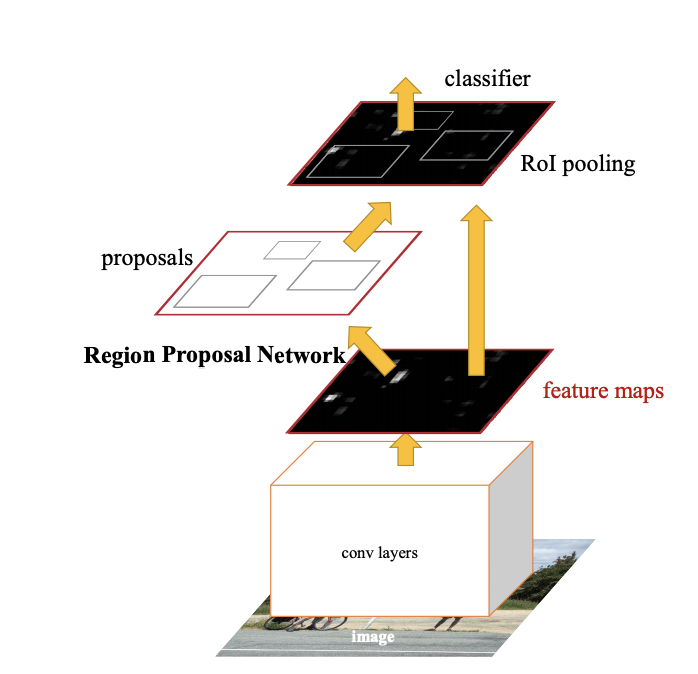


# 問題⑤ RoIプーリングとは何か。<br>
Roiプーリングは、アスペクト比の違いを考慮し、Maxプーリングを行うもの。<br>
プールするときのkernel_sizeが異なるもの。<br>

◾️引用<br>
論文では説明がほとんどないため、別資料参照。

https://blog.negativemind.com/2019/02/14/general-object-recognition-fast-r-cnn/#:~:text=RoI%20Pooling%E3%81%AF%E3%80%81%E3%82%A2%E3%82%B9%E3%83%9A%E3%82%AF%E3%83%88%E6%AF%94,Max%20Pooling%E3%82%92%E8%A1%8C%E3%81%86%E5%87%A6%E7%90%86%E3%80%82




# 問題⑥ Anchor-boxのサイズはどうするのが適切か。<br>

anchor boxの概念として、画像の長さ（pixel）とアスペクト比（1:2等）を掛け合わせてバウンディングボックスを作成する。<br>
anchor boxは特徴量マップの段階で実装し、各点事にポイントを付与するので、W×H×画像の長さ×アスペクト比の数だけ生成される。
3つのスケールと3つのアスペクト比を使用し、物体の長さと最適なものが見つかれば良いので、スケールのサイズとアスペクト比が重要になってくる。結論は画像によって変わってくるが、より小さいものを検出したい場合はスケールのサイズは低くなる傾向がある。
<br>


◾️引用<br>
【3ページ目】<br>
An anchor is centered at the sliding window in question, and is associated with a scale and aspect ratio (Figure 3, left). By default we use 3 scales and 3 aspect ratios, yielding k = 9 anchors at each sliding position. <br>
For a convolutional feature map of a size W × H (typically ∼2,400), there are W Hk anchors in total.<br>
<br>
The translation-invariant property also reduces the model size. MultiBox has a (4 + 1) × 800-dimensional fully-connected output layer, whereas our method has a (4 + 2) × 9-dimensional convolutional output layer in the case of k = 9 anchors. As a result, our output layer has 2.8 × 104 parameters (512 × (4 + 2) × 9 for VGG-16), two orders of magnitude fewer than MultiBox’s output layer that has 6.1 × 106 parameters (1536 × (4 + 1) × 800 for GoogleNet [34] in MultiBo [27]). If considering the feature projection layers, our proposal layers still have an order of magnitude fewer parameters than MultiBox6. 
<br>

【参考サイト】<br>
https://medium.com/lsc-psd/faster-r-cnn%E3%81%AB%E3%81%8A%E3%81%91%E3%82%8Brpn%E3%81%AE%E4%B8%96%E7%95%8C%E4%B8%80%E5%88%86%E3%81%8B%E3%82%8A%E3%82%84%E3%81%99%E3%81%84%E8%A7%A3%E8%AA%AC-dfc0c293cb69
<br>
<br>




# 問題⑦ 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。


PASCAL VOC 2007 検出ベンチマークを利用しており、mAPは速度の事を示している。<br>
高速R-CNNフレームワークでは，SSのmAPは58.7%，EBのmAPは58.6%となりました．高速R-CNNを用いたRPNは競争力のある結果を達成しました。<br>
最大300個のプロポーザルを使用しても59.9%という競争力のある結果を得ることができました。<br>
RPN+VGGでは、RPN＋SSより良いネットワークの恩恵を受けることができます。<br>
特徴共有型の場合は 結果は69.9%となり、強力なSSのベースラインよりも優れていますが の結果を得ることができましたが，ほとんどコストのかからない提案でした．<br>
さらに、RPNと検出ネットワークを さらに，RPNと検出ネットワークを，PASCAL VOC 2007の訓練値と2012の訓練値の結合セットで訓練したmAP は73.2%でした．<br>

<br>

◾️引用<br>
【7ページ目】<br>
We comprehensively evaluate our method on the PASCAL VOC 2007 detection benchmark [11]. <br>
SS has an mAP of 58.7% and EB has an mAP of 58.6% under the Fast R-CNN framework. <br>
RPN with Fast R-CNN achieves competitive results, with an mAP of 59.9% while using up to 300 proposals8.<br>


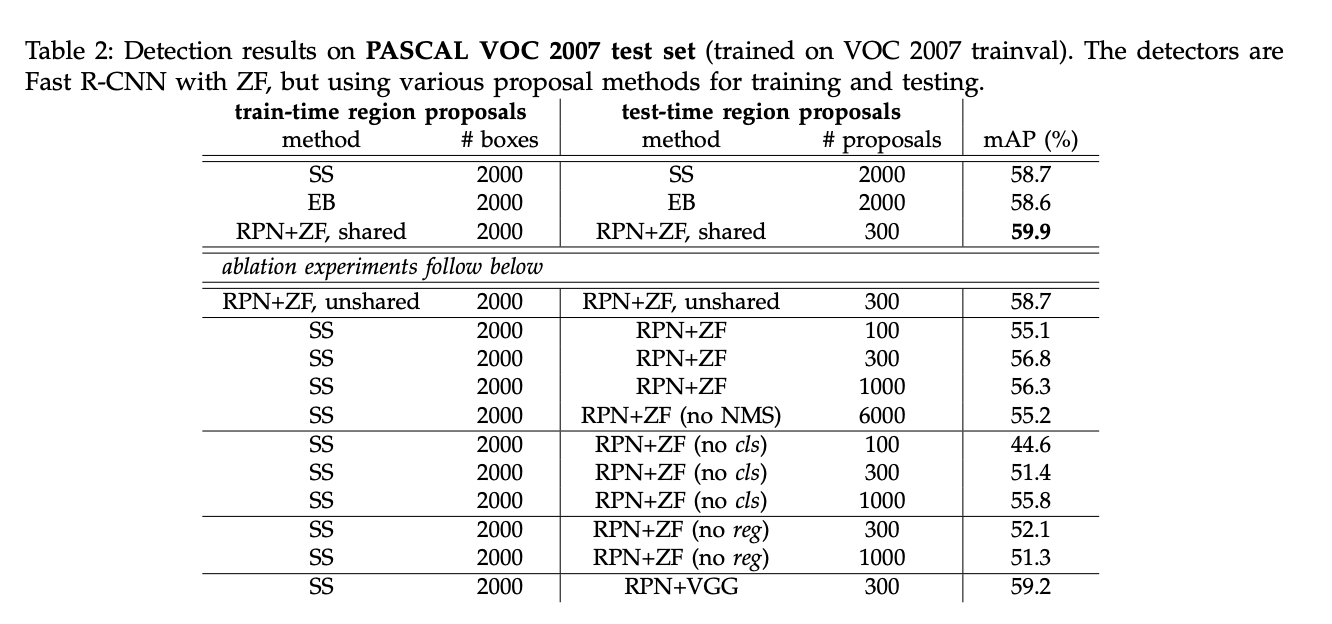

【9ページ目】<br>
Unlike SS that is predefined, the RPN is actively trained and benefits from
better networks. <br>
For the feature-shared variant, the result is 69.9%—better than the strong SS baseline, yet with nearly cost-free proposals. <br>
We further train the RPN and detection network on the union set of PASCAL VOC 2007 trainval and 2012 trainval. <br>
The mAP is 73.2%. Figure 5 shows some results on the PASCAL VOC 2007 test set. <br>
On the PASCAL VOC 2012 test set (Table 4), our method has an mAP of 70.4% trained on the union set of VOC 2007 trainval+test and VOC
2012 trainval. <br>

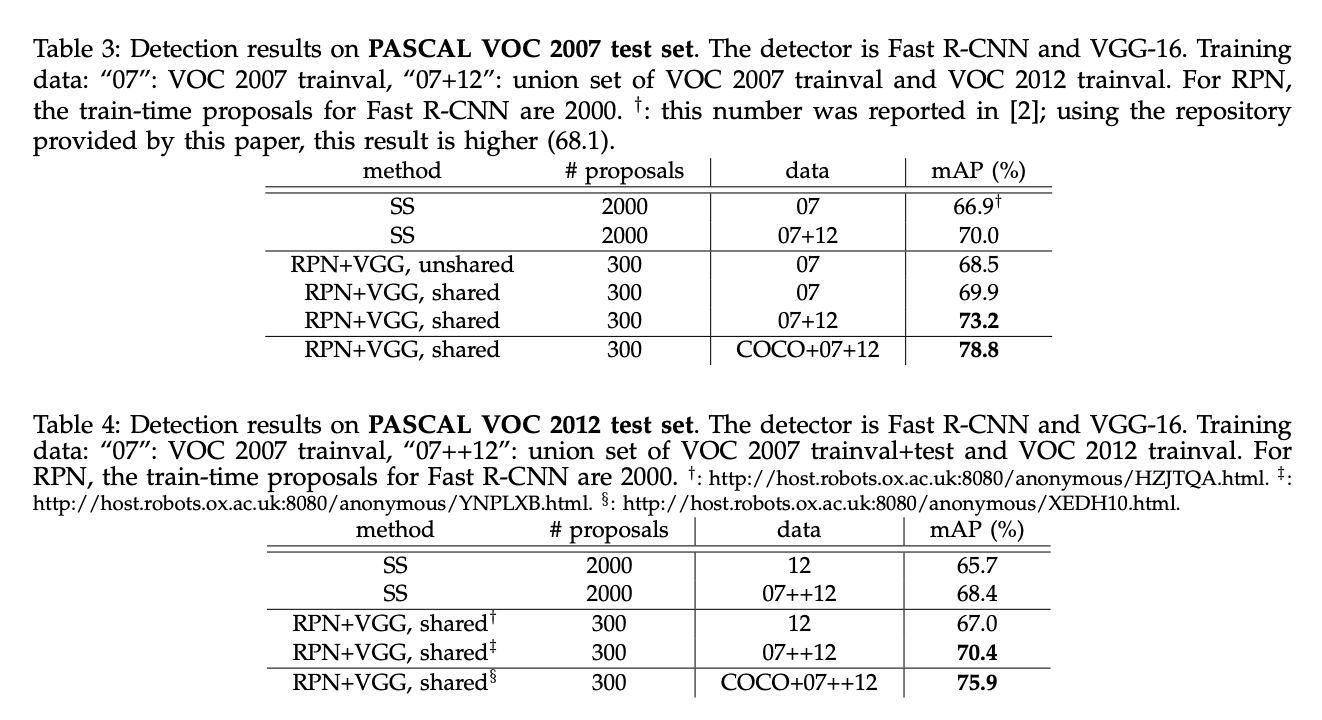

<br>
<br>
<br>